In [1]:
import h5py
import numpy as np
from qiskit.quantum_info import partial_trace
import matplotlib.pyplot as plt

In [2]:
# create |+><+| operator
v = np.array([1, 1j])/np.sqrt(2)
op = np.outer(v, v.conj())

f = h5py.File('free_evol.h5','r')
# load the time points from the h5 file
tp = np.array(f['QERes/t'])
# load the density matrices from the h5 file
rho = np.array(f['QERes/states'])
# use partial_trace to get the reduced density matrix of the 2nd qubit
fp=[partial_trace(rho[i,:,:], [0,1,3]).expectation_value(op).real for i in range(1,11)]
f.close()

f = h5py.File('dd_spectator.h5','r')
tds = np.array(f['QERes/t'])
rho = np.array(f['QERes/states'])
fds=[partial_trace(rho[i,:,:], [0,1,3]).expectation_value(op).real for i in range(1,11)]
f.close()

f = h5py.File('dd_main.h5','r')
tdm = np.array(f['QERes/t'])
rho = np.array(f['QERes/states'])
fdm=[partial_trace(rho[i,:,:], [0,1,3]).expectation_value(op).real for i in range(1,11)]
f.close()

In [3]:
tp

array([  30.,  150.,  270.,  390.,  510.,  630.,  750.,  870.,  990.,
       1110., 1230., 1260.])

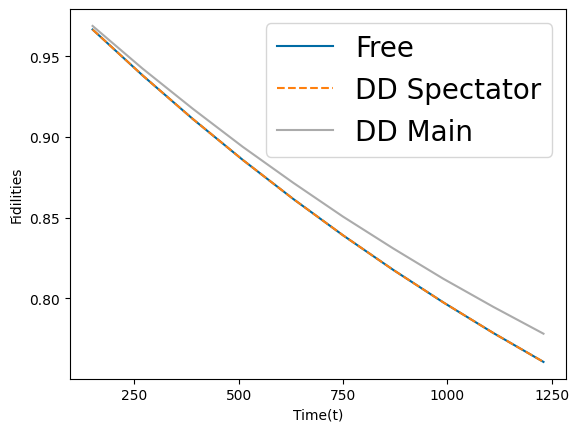

In [4]:
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

fig, ax = plt.subplots()

plt.rcParams.update({'font.size': 20})

# fig, ax = plt.subplots()
ax.plot(tp[1:-1], fp, label='Free')
ax.plot(tds[1:-1], fds, linestyle="dashed", label='DD Spectator')
ax.plot(tdm[1:-1], fdm, label='DD Main')
ax.set_xlabel('Time(t)')
ax.set_ylabel('Fidilities')
ax.legend()
plt.show()